# Week 2 Assignment

In [1]:
%%bash
ls data

ExcelFormattedGISTEMPData2CSV.csv
ExcelFormattedGISTEMPData2JS.js
ExcelFormattedGISTEMPData2TXT.txt
ExcelFormattedGISTEMPDataCSV.csv
ExcelFormattedGISTEMPDataJS.js
ExcelFormattedGISTEMPDataTXT.txt
readme.txt


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import parallel_coordinates

In [3]:
df_yearly = pd.read_csv('data/ExcelFormattedGISTEMPData2CSV.csv')
df_monthly = pd.read_csv('data/ExcelFormattedGISTEMPDataCSV.csv')

In [12]:
df_yearly.columns

Index(['Year', 'Glob', 'NHem', 'SHem', '24N-90N', '24S-24N', '90S-24S',
       '64N-90N', '44N-64N', '24N-44N', 'EQU-24N', '24S-EQU', '44S-24S',
       '64S-44S', '90S-64S'],
      dtype='object')

Text(0.5,0,'Global Temperature (Celsius)')

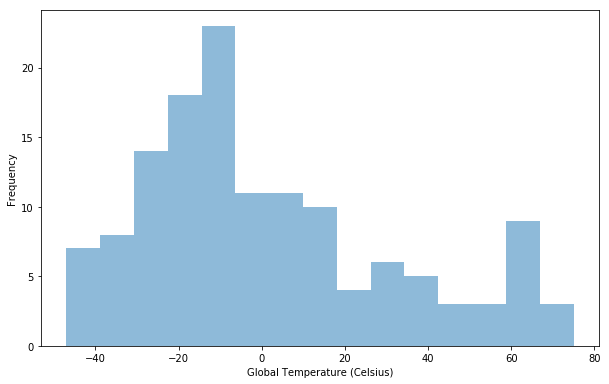

In [107]:
plt.figure(figsize=(10,6.18));
df_yearly['Glob'].plot.hist(alpha=0.5,bins=15)
plt.xlabel('Global Temperature (Celsius)')


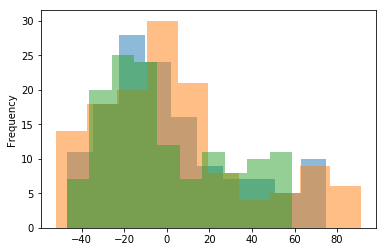

In [13]:
plt.figure();
df_yearly['Glob'].plot.hist(alpha=0.5)
df_yearly['NHem'].plot.hist(alpha=0.5)
df_yearly['SHem'].plot.hist(alpha=0.5)

<Figure size 432x288 with 0 Axes>

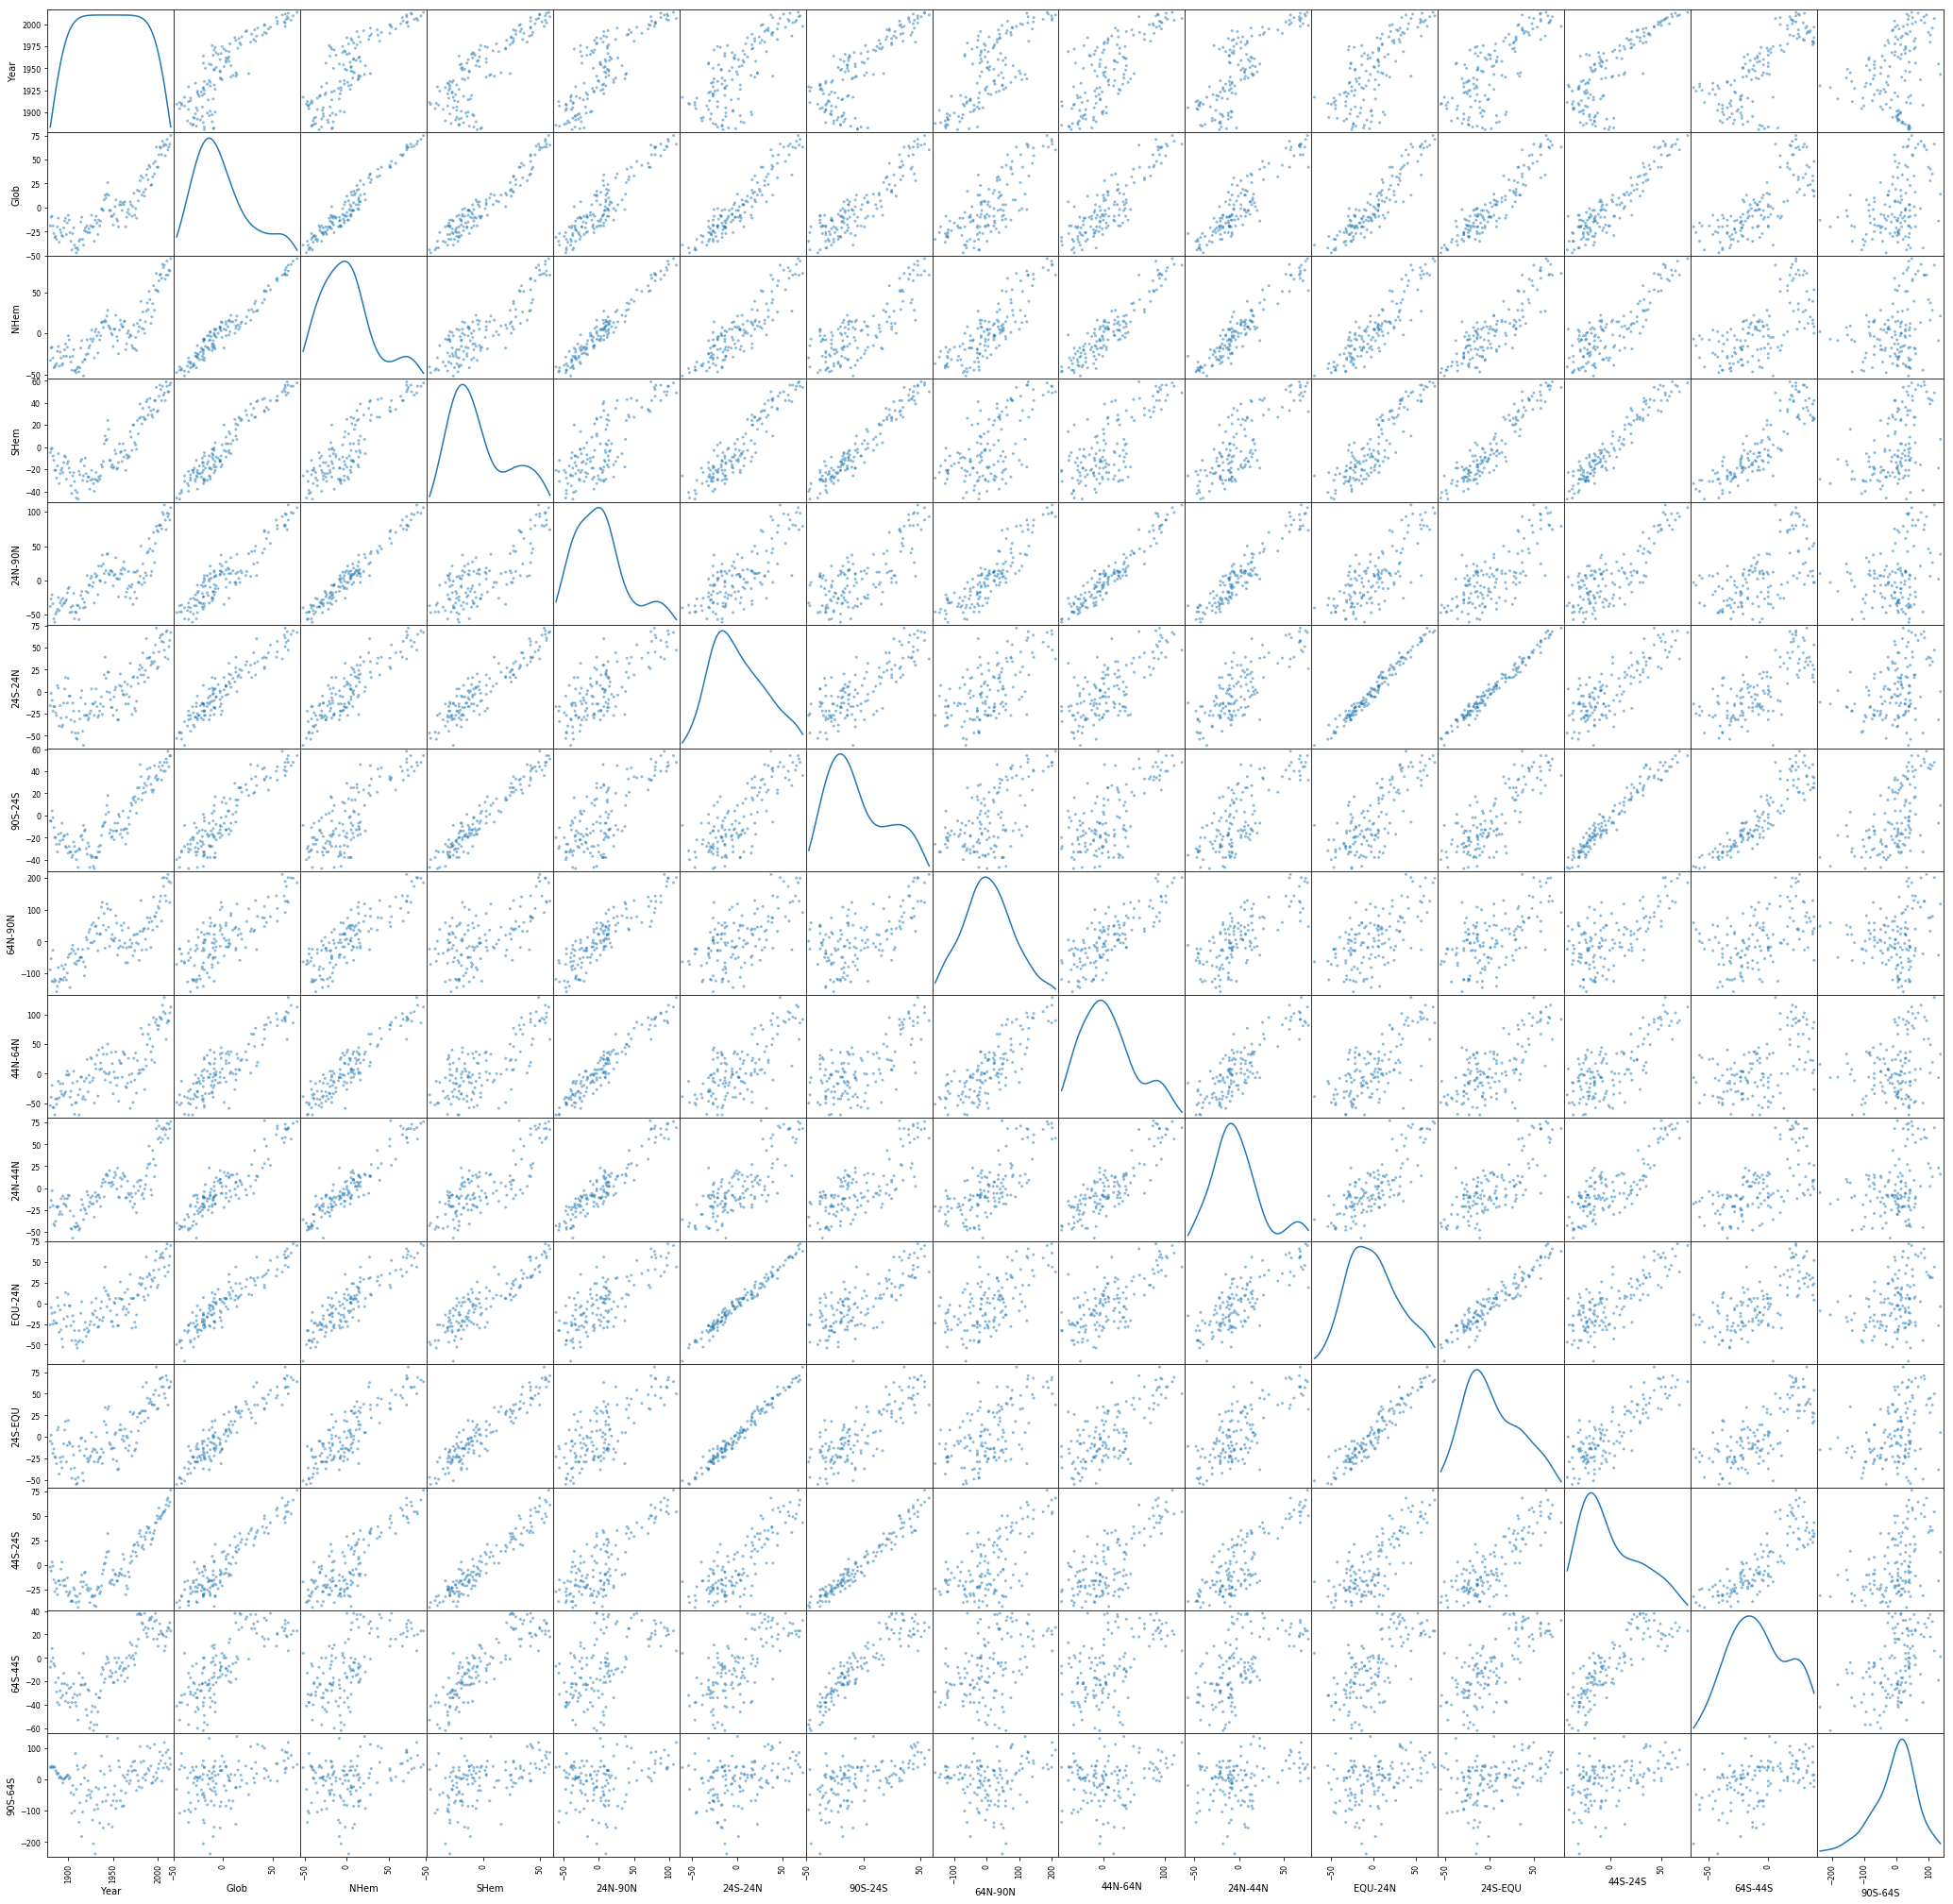

In [80]:
plt.figure();
scatter_matrix(df_yearly, alpha=0.5, figsize=(36, 36), diagonal='kde')
plt.show()

Text(0,0.5,'Average Temperature (Celsius)')

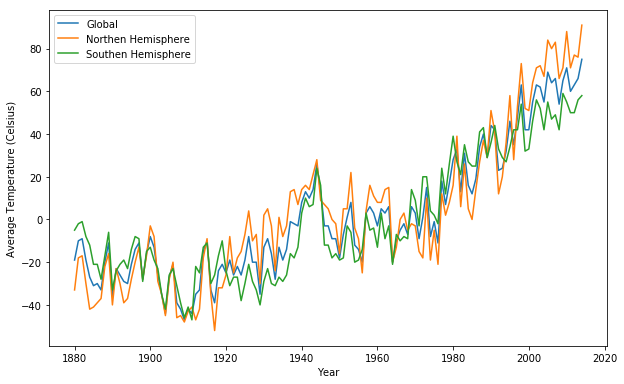

In [32]:
plt.figure(figsize=(10,6.18));
plt.plot(df_yearly['Year'], df_yearly['Glob'])
plt.plot(df_yearly['Year'], df_yearly['NHem'])
plt.plot(df_yearly['Year'], df_yearly['SHem'])
plt.legend(['Global','Northen Hemisphere','Southen Hemisphere'])
plt.xlabel('Year')
plt.ylabel('Average Temperature (Celsius)')

In [53]:
regions = ['24N-90N', '24S-24N', '90S-24S','64N-90N', '44N-64N', '24N-44N', 'EQU-24N', '24S-EQU', '44S-24S','64S-44S', '90S-64S']
df_yearly_t = df_yearly[['Year'] +regions].T
df_yearly_t.columns = df_yearly_t.iloc[0]
df_yearly_t = df_yearly_t.drop('Year')

In [66]:
regions_ordered = ['64N-90N', '44N-64N', '24N-44N', 'EQU-24N', '24S-EQU', '44S-24S','64S-44S', '90S-64S']
df_one = df_yearly[df_yearly['Year'] == 1880][regions_ordered]
df_one

,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,-89,-54,-22,-26,-5,-2,-8,39


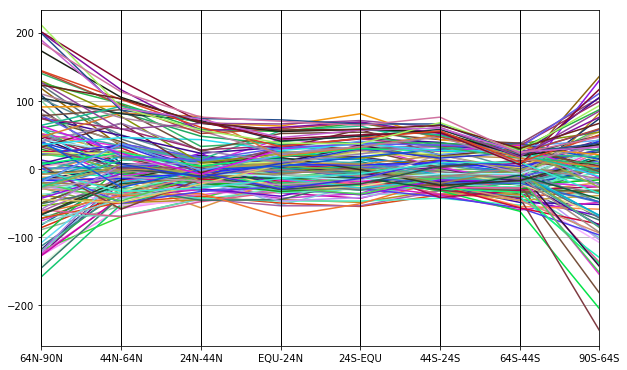

In [77]:
ax = plt.figure(figsize=(10,6.18))
ax = parallel_coordinates(df_yearly[['Year']+regions_ordered],'Year')
ax.legend().remove()

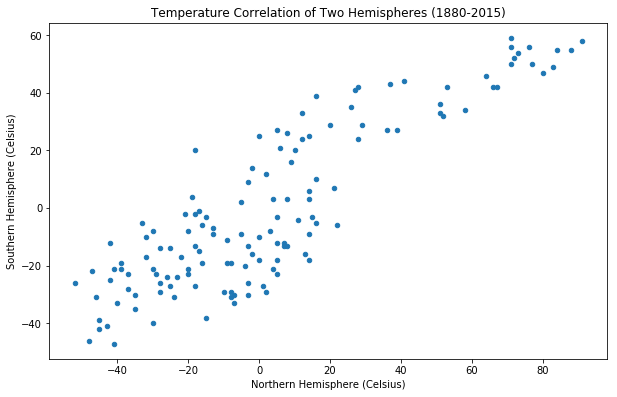

In [123]:
df_yearly.plot.scatter(x='NHem', y='SHem',figsize=(10,6.18))
plt.xlabel('Northern Hemisphere (Celsius)')
plt.ylabel('Southern Hemisphere (Celsius)')
plt.title('Temperature Correlation of Two Hemispheres (1880-2015)')
plt.show()

## Monthly

<Figure size 432x288 with 0 Axes>

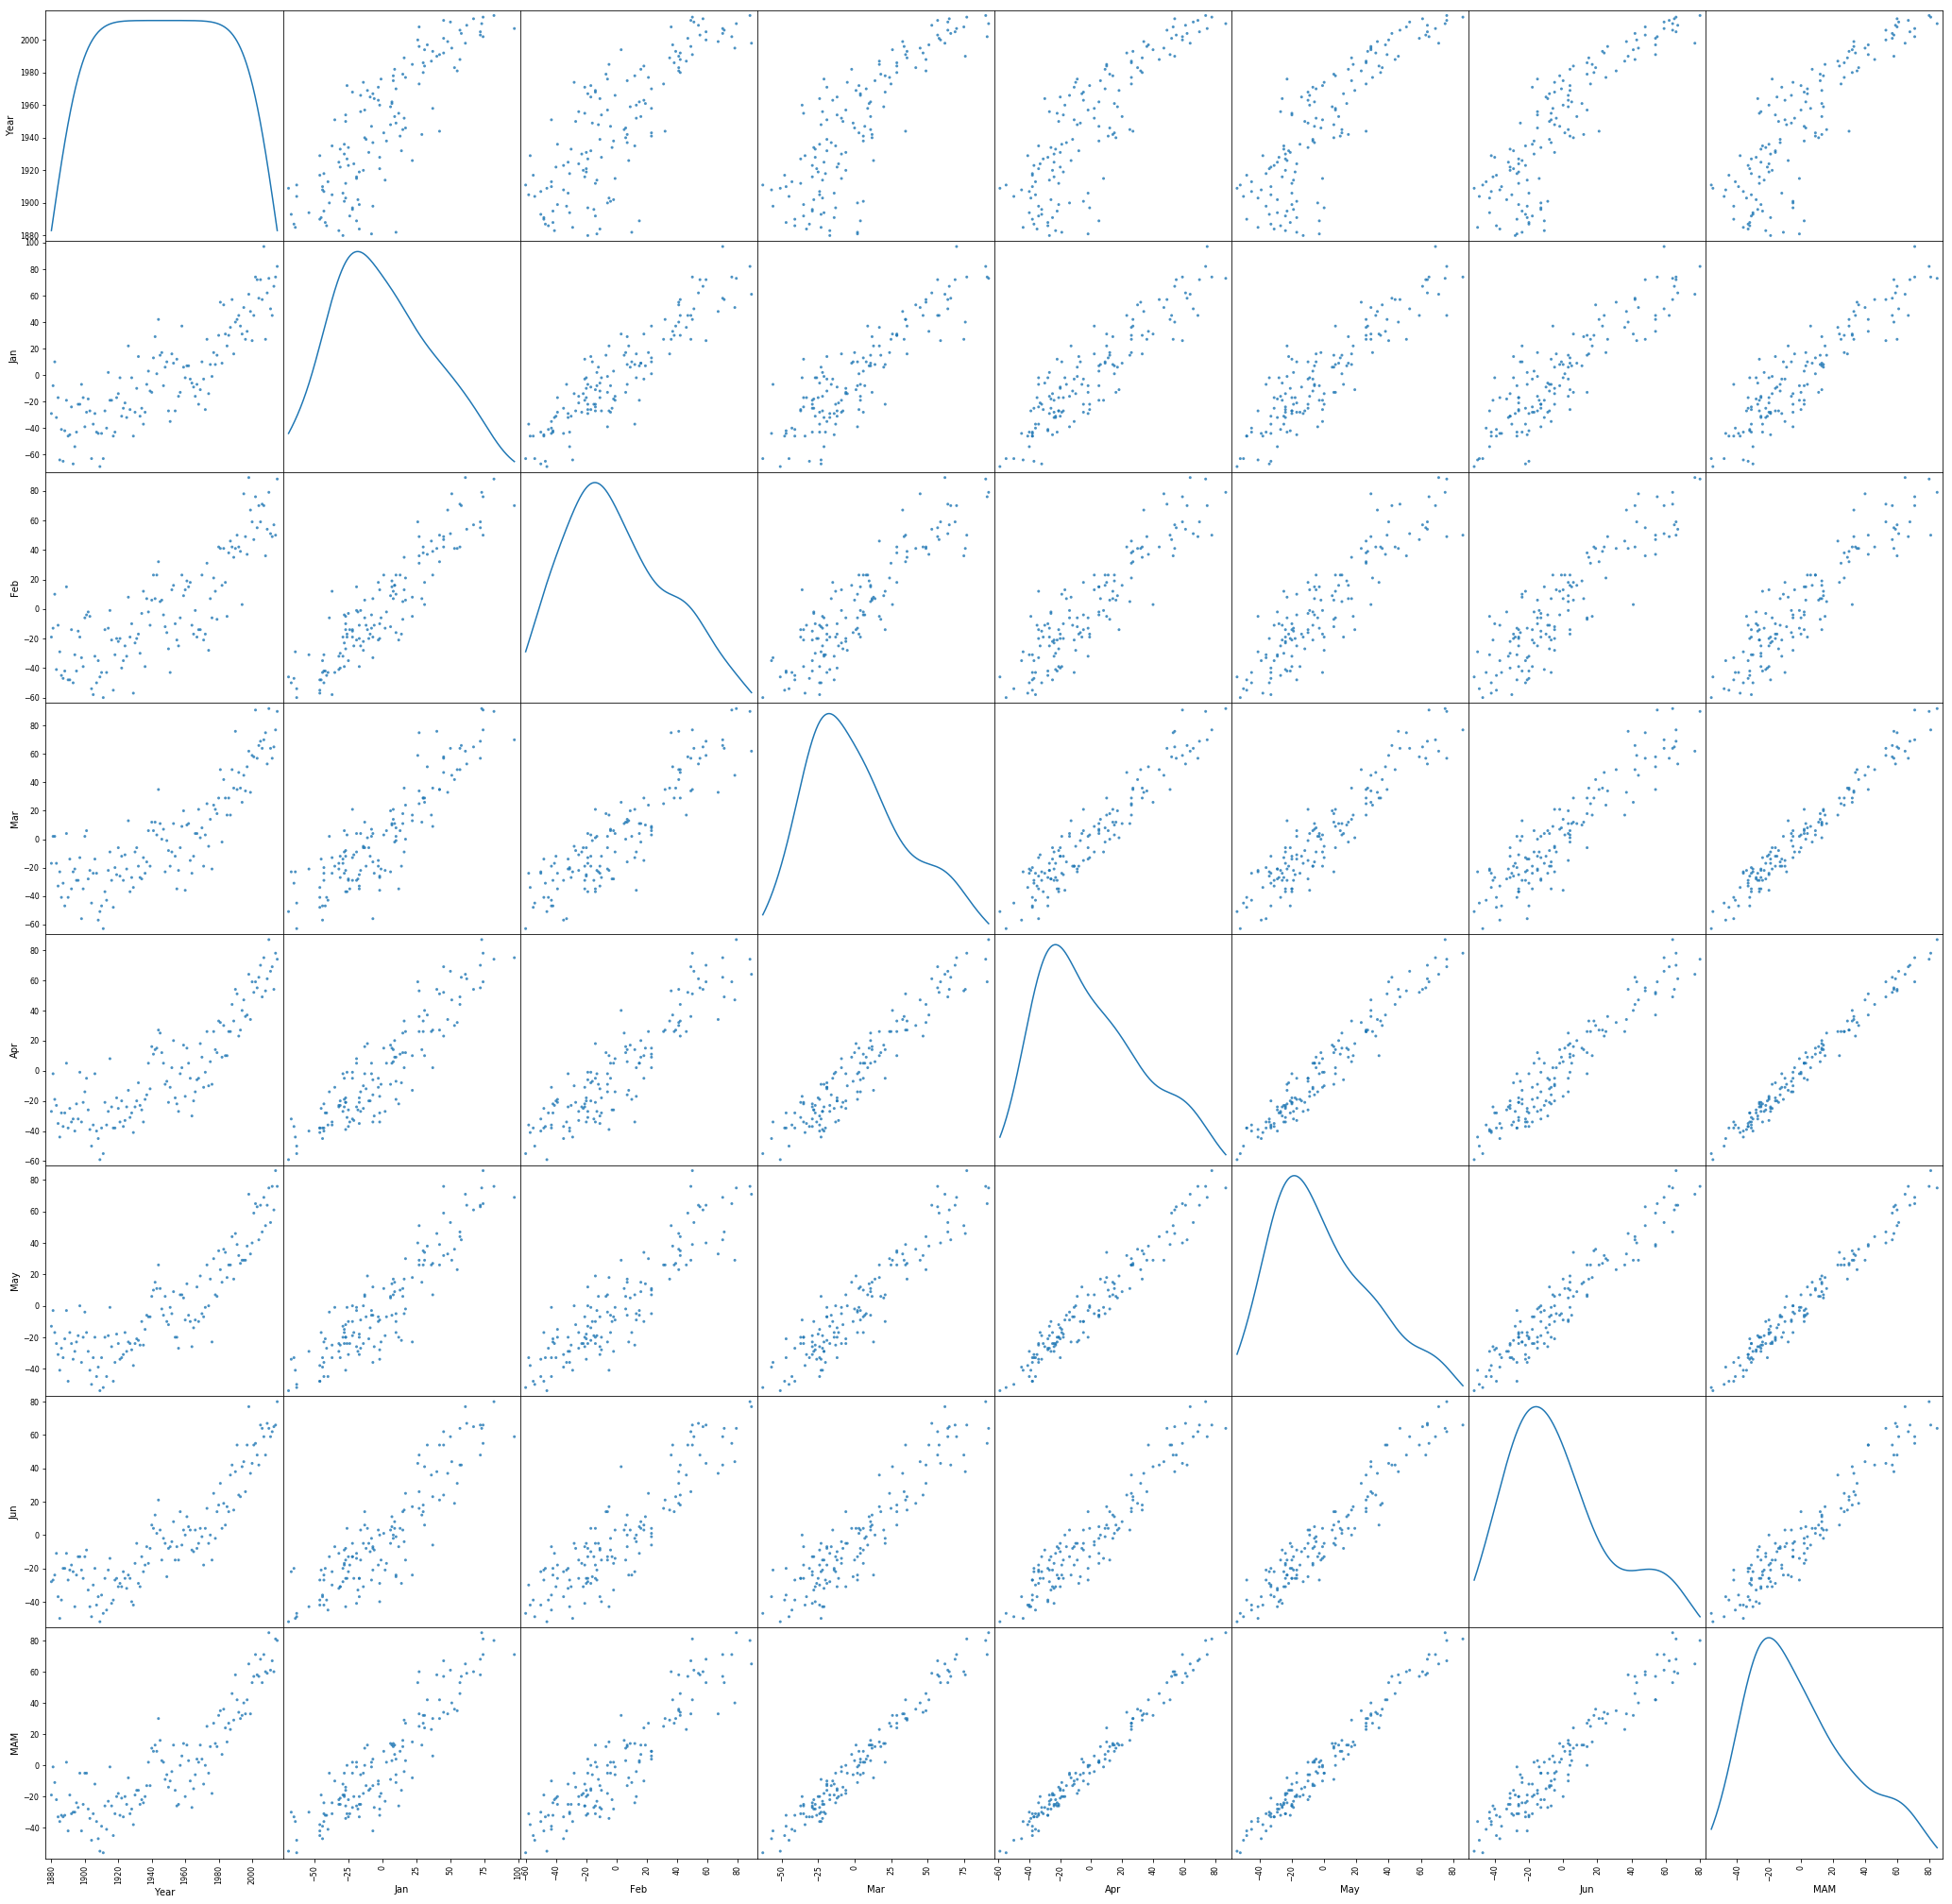

In [81]:
plt.figure();
scatter_matrix(df_monthly, alpha=0.8, figsize=(36, 36), diagonal='kde')
plt.show()

In [94]:
df_monthly_selected.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON'],
      dtype='object')

In [95]:
months = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
df_monthly_selected = df_monthly.replace(['***','****'], ['NaN','NaN'])[months]

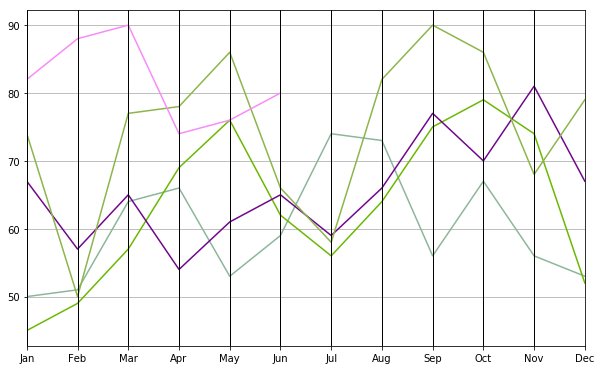

In [100]:
ax = plt.figure(figsize=(10,6.18))
ax = parallel_coordinates(df_monthly_selected[df_monthly_selected['Year']>2010],'Year')
ax.legend().remove()